In [237]:
# Import library and data
import pandas as pd
import numpy as np
import os
import argparse
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
import math
import operator
from scipy.spatial.distance import cosine
import csv

os.getcwd()
data=pd.read_csv('C:/Users/mxm5116/Desktop/Data Mining/iris.csv')
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


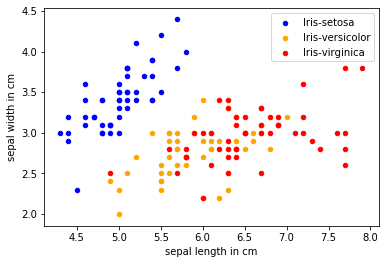

In [139]:
# Lets see the visualization of different class
%matplotlib inline
# Let see the sepal pattern
ax = data[data['class'] == 'Iris-setosa'].plot.scatter(x='sepal length in cm', y='sepal width in cm', c='blue', label='Iris-setosa')
ax = data[data['class'] == 'Iris-versicolor'].plot.scatter(x='sepal length in cm', y='sepal width in cm', c='orange', label='Iris-versicolor', ax=ax)
ax = data[data['class'] == 'Iris-virginica'].plot.scatter(x='sepal length in cm', y='sepal width in cm', c='red', label='Iris-virginica', ax=ax)
ax


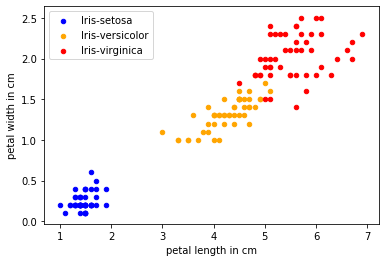

In [140]:
# Let see the petal pattern

ax = data[data['class'] == 'Iris-setosa'].plot.scatter(x='petal length in cm', y='petal width in cm', c='blue', label='Iris-setosa')
ax = data[data['class'] == 'Iris-versicolor'].plot.scatter(x='petal length in cm', y='petal width in cm', c='orange', label='Iris-versicolor', ax=ax)
ax = data[data['class'] == 'Iris-virginica'].plot.scatter(x='petal length in cm', y='petal width in cm', c='red', label='Iris-virginica', ax=ax)
ax

# a.Divide the dataset as development and test. Because kNN does not require training you don’t have a train dataset. Make sure randomly divide the dataset 


In [141]:
# create design matrix X and target vector y
X = np.array(data.ix[:, 0:4])  
y = np.array(data['class'])  

Dev_data_X, \
test_data_X, \
Dev_data_y, \
test_data_y = train_test_split(X, y, test_size=0.40, random_state=42)
print(Dev_data_X)
print(test_data_X)
print(Dev_data_y)
print(test_data_y)

[[6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.1]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [4.3 3.  1.1 0.1]
 [6.  2.2 5.  1.5]
 [7.2 3.2 6.  1.8]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [6.3 2.5 4.9 1.5]
 [6.3 3.4 5.6 2.4]
 [4.6 3.4 1.4 0.3]
 [6.8 3.  5.5 2.1]
 [6.3 3.3 6.  2.5]
 [4.7 3.2 1.3 0.2]
 [6.1 2.9 4.7 1.4]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [7.  3.2 4.

C:\Users\mxm5116\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [142]:
print(Dev_data_X.shape)
print(test_data_X.shape)
print(Dev_data_y.shape)
print(test_data_y.shape)

(90, 4)
(60, 4)
(90,)
(60,)


# b.	implement kNN using the following hyperparameters
* number of neighbor K 
 * 1,3,5,7
* distance metric
•	euclidean distance
•	normalized euclidean distance
•	cosine similarity


#  c. Using the development dataset,

    Calculate accuracy by iterating all of the development data point
    Find optimal hyperparameters

     * Draw bar charts for accuracy
     
     
#  d. Using the test dataset

  * Use the optimal hyperparameters you found in the step c, and use it to calculate the final accuracy.  


# Lets Find the best Hyperparameter for Iris data out of K=1,3,5,7,9,11,13,15,17,19,21

In [143]:
# Now lets Run KNN with a range of K value
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

params = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21],
          'leaf_size':[1,2,3,5,10,15,20,30],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
Dev_model = KNeighborsClassifier(n_jobs=-1)
KNN_model = GridSearchCV(Dev_model, param_grid=params, n_jobs=1)
KNN_model.fit(Dev_data_X,Dev_data_y)
print("Best Hyper Parameters:\n",KNN_model.best_params_)
prediction=KNN_model.predict(test_data_X)
print("Accuracy:",metrics.accuracy_score(prediction,test_data_y))
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_data_y))

C:\Users\mxm5116\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9833333333333333
Confusion Metrix:
 [[23  0  0]
 [ 0 19  1]
 [ 0  0 17]]


C:\Users\mxm5116\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# So,from above program it was found that best hyperparameter,K =7, Now we will apply K=7 in our euclidean distance KNN

In [144]:
# Now Apply  euclidean distance in KNN step by step 
def train(Dev_data_X, Dev_data_y):
    return

def predict(Dev_data_X, Dev_data_y, test_data_X, k):
   

    distances = []
    targets = []

    for i in range(len(Dev_data_X)):
        distances.append([np.sqrt(np.sum(np.square(test_data_X - Dev_data_X[i, :]))), i])

    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(Dev_data_y[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [12]:
def k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, k):
    # train on the develop data
    train(Dev_data_X, Dev_data_y)

    # loop over all observations
    predictions = []
    for i in range(len(test_data_X)):
        predictions.append(predict(Dev_data_X, Dev_data_y, test_data_X[i, :], k))

    return np.asarray(predictions)


In [242]:
# Now make the predictions when, k=1
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 1)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy1 {}".format(100*accuracy))

# Now make the predictions when, k=3
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 3)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy3 {}".format(100*accuracy))

# Now make the predictions when, k=5
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 5)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy5 {}".format(100*accuracy))

# Now make the predictions when, k=7
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 5)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy7 {}".format(100*accuracy))

# Now make the predictions when, k=9
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 9)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy9 {}".format(100*accuracy))

# Now make the predictions when, k=11
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 11)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy11 {}".format(100*accuracy))

# Now make the predictions when, k=13
predictions = k_nearest_neighbor(Dev_data_X, Dev_data_y, test_data_X, 13)

# Evaluate accuracy
accuracy = accuracy_score(test_data_y, predictions)
print(" accuracy13 {}".format(100*accuracy))

 accuracy1 98.33333333333333
 accuracy3 98.33333333333333
 accuracy5 98.33333333333333
 accuracy7 98.33333333333333
 accuracy9 98.33333333333333
 accuracy11 100.0
 accuracy13 100.0


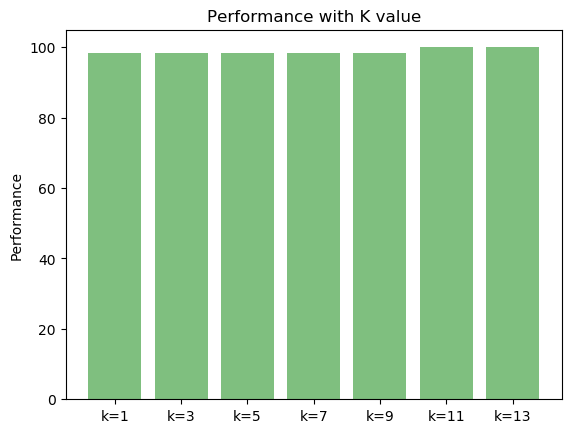

In [207]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects=('k=1','k=3','k=5','k=7','k=9','k=11','k=13')
y_pos = np.arange(len(objects))
performance = [98.33,98.33,98.33,98.33,98.33,100.0,100.0]
plt.bar(y_pos, performance, align='center', alpha=0.5,color='green')
plt.xticks(y_pos, objects)
plt.ylabel('Performance')
plt.title('Performance with K value')
plt.show()


# So at the starting, we have seen that K=7 is best hyperparameter. Now from the above manual coding, we have found that upto k=9, the accuracy is same for euclidean distance. So we will take k=7

#  Now use normalized euclidean distance 


In [14]:
# normalizing the data
normalize = (X - X.min()) / (X.max() - X.min())
print(normalize)

Dev_norm_data_X, \
test_norm_data_X, \
Dev_norm_data_y, \
test_norm_data_y = train_test_split(normalize, y, test_size=0.40, random_state=42)


[[0.64102564 0.43589744 0.16666667 0.01282051]
 [0.61538462 0.37179487 0.16666667 0.01282051]
 [0.58974359 0.3974359  0.15384615 0.01282051]
 [0.57692308 0.38461538 0.17948718 0.01282051]
 [0.62820513 0.44871795 0.16666667 0.01282051]
 [0.67948718 0.48717949 0.20512821 0.03846154]
 [0.57692308 0.42307692 0.16666667 0.02564103]
 [0.62820513 0.42307692 0.17948718 0.01282051]
 [0.55128205 0.35897436 0.16666667 0.01282051]
 [0.61538462 0.38461538 0.17948718 0.        ]
 [0.67948718 0.46153846 0.17948718 0.01282051]
 [0.6025641  0.42307692 0.19230769 0.01282051]
 [0.6025641  0.37179487 0.16666667 0.        ]
 [0.53846154 0.37179487 0.12820513 0.        ]
 [0.73076923 0.5        0.14102564 0.01282051]
 [0.71794872 0.55128205 0.17948718 0.03846154]
 [0.67948718 0.48717949 0.15384615 0.03846154]
 [0.64102564 0.43589744 0.16666667 0.02564103]
 [0.71794872 0.47435897 0.20512821 0.02564103]
 [0.64102564 0.47435897 0.17948718 0.02564103]
 [0.67948718 0.42307692 0.20512821 0.01282051]
 [0.64102564 

In [15]:
print(Dev_norm_data_X)
print(test_norm_data_X)
print(Dev_norm_data_y)
print(test_norm_data_y)

[[0.79487179 0.33333333 0.61538462 0.21794872]
 [0.6025641  0.42307692 0.23076923 0.01282051]
 [0.62820513 0.37179487 0.19230769 0.01282051]
 [0.64102564 0.41025641 0.20512821 0.05128205]
 [0.70512821 0.33333333 0.52564103 0.15384615]
 [0.64102564 0.42307692 0.17948718 0.01282051]
 [0.71794872 0.37179487 0.52564103 0.14102564]
 [0.97435897 0.47435897 0.84615385 0.26923077]
 [0.57692308 0.3974359  0.16666667 0.01282051]
 [0.78205128 0.35897436 0.53846154 0.15384615]
 [0.71794872 0.30769231 0.62820513 0.24358974]
 [0.69230769 0.52564103 0.16666667 0.01282051]
 [0.75641026 0.37179487 0.6025641  0.21794872]
 [0.73076923 0.33333333 0.64102564 0.23076923]
 [0.75641026 0.26923077 0.5        0.11538462]
 [0.67948718 0.37179487 0.56410256 0.17948718]
 [0.78205128 0.42307692 0.67948718 0.28205128]
 [0.69230769 0.28205128 0.5        0.15384615]
 [0.67948718 0.48717949 0.20512821 0.03846154]
 [0.62820513 0.28205128 0.41025641 0.11538462]
 [0.80769231 0.33333333 0.66666667 0.23076923]
 [0.62820513 

In [208]:
# Now lets Run KNN with a range of K value and normalized euclidean distance
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

params = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21],
          'leaf_size':[1,2,3,5,10,15,20,30],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
Dev_model = KNeighborsClassifier(n_jobs=-1)
KNN_model = GridSearchCV(Dev_model, param_grid=params, n_jobs=1)
KNN_model.fit(Dev_norm_data_X,Dev_norm_data_y)
print("Best Hyper Parameters:\n",KNN_model.best_params_)
prediction=KNN_model.predict(test_norm_data_X)
print("Accuracy:",metrics.accuracy_score(prediction,test_norm_data_y))
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_norm_data_y))

C:\Users\mxm5116\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9833333333333333
Confusion Metrix:
 [[23  0  0]
 [ 0 19  1]
 [ 0  0 17]]


C:\Users\mxm5116\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# After normalizing the best hyperparameter and accuracy of the algorithm did not change, it is still K=7 and accuracy =98.33, now lets see the step by step in manual

In [222]:
# Now Apply  euclidean distance in KNN step by step 
def train(Dev_norm_data_X, Dev_norm_data_y):
    return

def predict(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X, k):
   

    distances = []
    targets = []

    for i in range(len(Dev_norm_data_X)):
        distances.append([np.sqrt(np.sum(np.square(test_norm_data_X - Dev_norm_data_X[i, :]))), i])

    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(Dev_norm_data_y[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]


def k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X, k):
    # train on the develop data
    train(Dev_norm_data_X, Dev_norm_data_y)

    # loop over all observations
    predictions = []
    for i in range(len(test_norm_data_X)):
        predictions.append(predict(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X[i, :], k))

    return np.asarray(predictions)




The accuracy of our classifier is 98.33333333333333


# Now check the accuracy for different K values

In [245]:
# Now make the predictions, when, k=1
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,1)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy1 {}".format(100*accuracy))

# Now make the predictions, when, k=3
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,3)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy3 {}".format(100*accuracy))

# Now make the predictions, when, k=5
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,5)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy5 {}".format(100*accuracy))

# Now make the predictions, when, k=7
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,7)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy7 {}".format(100*accuracy))

# Now make the predictions, when, k=9
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,9)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy9 {}".format(100*accuracy))

# Now make the predictions, when, k=11
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,11)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy11 {}".format(100*accuracy))


# Now make the predictions, when, k=13
predictions = k_nearest_neighbor(Dev_norm_data_X, Dev_norm_data_y, test_norm_data_X,13)

# Evaluate accuracy
accuracy = accuracy_score(test_norm_data_y, predictions)
print("accuracy13 {}".format(100*accuracy))

accuracy1 98.33333333333333
accuracy3 98.33333333333333
accuracy5 98.33333333333333
accuracy7 98.33333333333333
accuracy9 98.33333333333333
accuracy11 100.0
accuracy13 100.0


# So, after normalizing our result does not change than euclidean

# Now lets apply the cosine similarity

In [122]:
def load_dataset(data, split):
    training_set = []
    test_set = []
    with open(data, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                training_set.append(dataset[x])
            else:
                test_set.append(dataset[x])

    return training_set, test_set

In [117]:
def cosine_distance(instance1, instance2):
    p1 = instance1[:-1]
    p2 = instance2[:-1]
    return cosine(p1, p2)


In [124]:
def get_neighbors(training_set, test_instance, k):
    distances = []
    length = len(test_instance) 
    for x in range(len(training_set)):
            dist = cosine_distance(test_instance, training_set[x])
            distances.append((training_set[x], dist))
    distances.sort(key=operator.itemgetter(1))
    
    for x in range(k):
        neighbors = []
        neighbors.append(distances[x][0])
    return neighbors

In [125]:
def get_response(neighbors):
 
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

In [128]:
def get_accuracy(test_set, predictions):
    correct = 0
    for x in range(len(test_set)):
        if test_set[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(test_set))) * 100.0

In [227]:
# prepare data

split = 0.60
training_set, test_set = load_dataset('iris1.csv', split)
print('Train set: ' + repr(len(training_set)))
print('Test set: ' + repr(len(test_set)))
predictions = []        
for x in range(len(test_set)):
            neighbors = get_neighbors(training_set, test_set[x], 7)
            result = get_response(neighbors)
            predictions.append(result)
            print('> predicted=' + repr(result) + ', actual=' + repr(test_set[x][-1]))
accuracy = get_accuracy(test_set, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 90
Test set: 60
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-virginica', actual=

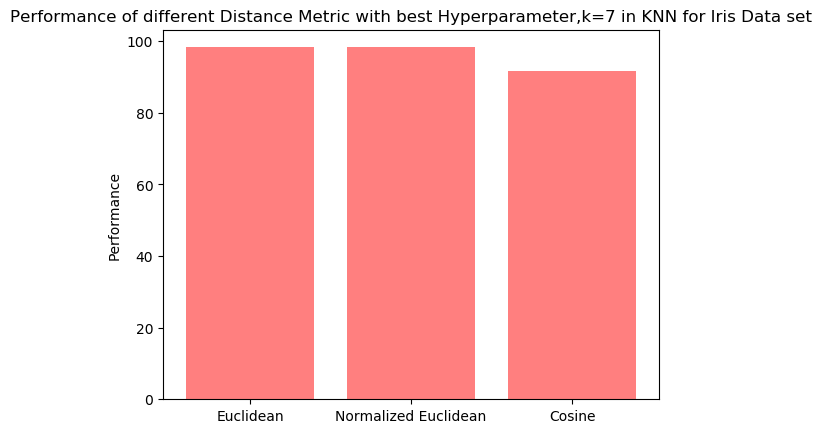

In [236]:
# Lets draw the final accuracy bar chart for different distance metric with best k=7
objects=('Euclidean','Normalized Euclidean','Cosine')
y_pos = np.arange(len(objects))
performance = [98.33,98.33,91.66]
plt.bar(y_pos, performance, align='center', alpha=0.5,color='red')
plt.xticks(y_pos, objects)
plt.ylabel('Performance')
plt.title('Performance of different Distance Metric with best Hyperparameter,k=7 in KNN for Iris Data set')
plt.show()

# Final comment: I found that for the iris data, best hyperparameter(k) is 7 and Euclidean distance metric performs better (98.33%) than Cosine distance(91.67%). There is no difference in performance for Euclidean and Normalized Euclidean in KNN.

References:
    01. https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
    02. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
    03. https://github.com/dtroupe18/SimpleKNN/blob/master/knn.py
    